In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sktime.transformations.compose import FitInTransform
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sktime.transformations.panel.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [ ]:
# loading previously saved datasets 
df_npz_y_npz = np.load('X, y time series.npz')


In [ ]:
# extracting dataframe and class labels from compressed files 
df,y = df_npz_y_npz['arr_0'], df_npz_y_npz['arr_1']


In [ ]:
# reshaping array into 2-d np-array
df = df.reshape(10000,1280)

In [5]:
df = pd.DataFrame(df)

In [ ]:
# defining noise removal 
def noise_remove(ts):
    return ((ts - ts.mean())/ts.std()).rolling(window = 10).mean()

In [12]:
df_noise = df.apply(lambda row: noise_remove(row), axis = 1)

In [13]:
df_noise

,0,1,2,3,4,5,6,7,8,9,...,1270,1271,1272,1273,1274,1275,1276,1277,1278,1279
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.726010,...,-0.579219,-0.591045,-0.605567,-0.608599,-0.588871,-0.535954,-0.489565,-0.460714,-0.472738,-0.486099
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.504967,...,-0.440377,-0.356866,-0.160761,0.038829,0.205647,0.295774,0.355192,0.410689,0.447727,0.353964
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.231888,...,-0.502055,-0.281987,-0.039137,0.208783,0.466430,0.743420,1.046023,1.369823,1.598744,1.767249
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.959821,...,-1.654070,-1.639285,-1.638362,-1.674885,-1.711214,-1.770243,-1.812511,-1.826641,-1.842982,-1.865446
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.085572,...,-0.197603,-0.269463,-0.247127,-0.155357,-0.105520,-0.168686,-0.342160,-0.548045,-0.689153,-0.751124
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.236191,...,-0.439387,-0.414987,-0.372197,-0.304222,-0.308620,-0.339709,-0.253636,-0.168561,-0.148589,-0.296570
9996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.367873,...,-0.202299,-0.165452,-0.147229,-0.137300,-0.116994,-0.080039,-0.068720,-0.090610,-0.148518,-0.243125
9997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.226524,...,1.330972,1.580832,1.783174,1.832325,1.905599,1.986387,1.920546,1.762407,1.569558,1.441567
9998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.000745,...,0.304283,0.329402,0.308823,0.280976,0.234414,0.159012,0.032844,-0.166751,-0.408979,-0.674757


In [16]:
df_removed = df_noise.apply(lambda row: row.fillna(row.mean()), axis = 1 )

In [18]:
df_removed 

,0,1,2,3,4,5,6,7,8,9,...,1270,1271,1272,1273,1274,1275,1276,1277,1278,1279
0,0.005776,0.005776,0.005776,0.005776,0.005776,0.005776,0.005776,0.005776,0.005776,-0.726010,...,-0.579219,-0.591045,-0.605567,-0.608599,-0.588871,-0.535954,-0.489565,-0.460714,-0.472738,-0.486099
1,-0.005210,-0.005210,-0.005210,-0.005210,-0.005210,-0.005210,-0.005210,-0.005210,-0.005210,1.504967,...,-0.440377,-0.356866,-0.160761,0.038829,0.205647,0.295774,0.355192,0.410689,0.447727,0.353964
2,-0.006539,-0.006539,-0.006539,-0.006539,-0.006539,-0.006539,-0.006539,-0.006539,-0.006539,-0.231888,...,-0.502055,-0.281987,-0.039137,0.208783,0.466430,0.743420,1.046023,1.369823,1.598744,1.767249
3,0.010123,0.010123,0.010123,0.010123,0.010123,0.010123,0.010123,0.010123,0.010123,-0.959821,...,-1.654070,-1.639285,-1.638362,-1.674885,-1.711214,-1.770243,-1.812511,-1.826641,-1.842982,-1.865446
4,0.001997,0.001997,0.001997,0.001997,0.001997,0.001997,0.001997,0.001997,0.001997,0.085572,...,-0.197603,-0.269463,-0.247127,-0.155357,-0.105520,-0.168686,-0.342160,-0.548045,-0.689153,-0.751124
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.005561,0.005561,0.005561,0.005561,0.005561,0.005561,0.005561,0.005561,0.005561,-0.236191,...,-0.439387,-0.414987,-0.372197,-0.304222,-0.308620,-0.339709,-0.253636,-0.168561,-0.148589,-0.296570
9996,0.000545,0.000545,0.000545,0.000545,0.000545,0.000545,0.000545,0.000545,0.000545,0.367873,...,-0.202299,-0.165452,-0.147229,-0.137300,-0.116994,-0.080039,-0.068720,-0.090610,-0.148518,-0.243125
9997,-0.003974,-0.003974,-0.003974,-0.003974,-0.003974,-0.003974,-0.003974,-0.003974,-0.003974,0.226524,...,1.330972,1.580832,1.783174,1.832325,1.905599,1.986387,1.920546,1.762407,1.569558,1.441567
9998,0.007319,0.007319,0.007319,0.007319,0.007319,0.007319,0.007319,0.007319,0.007319,-1.000745,...,0.304283,0.329402,0.308823,0.280976,0.234414,0.159012,0.032844,-0.166751,-0.408979,-0.674757


In [13]:
conda install -c conda-forge sktime-all-extras]

Retrieving notices: ...working... done
Solving environment: failed with initial frozen solve. Retrying with flexible solve.
WARNING conda.models.version:get_matcher(546): Using .* with relational operator is superfluous and deprecated and will be removed in a future version of conda. Your spec was 1.9.0.*, but conda is ignoring the .* and treating it as 1.9.0
done
Solving environment: failed with initial frozen solve. Retrying with flexible solve.

PackagesNotFoundError: The following packages are not available from current channels:

  - sktime-all-extras]

Current channels:

  - https://conda.anaconda.org/conda-forge/osx-arm64
  - https://conda.anaconda.org/conda-forge/noarch
  - https://repo.anaconda.com/pkgs/main/osx-arm64
  - https://repo.anaconda.com/pkgs/main/noarch
  - https://repo.anaconda.com/pkgs/r/osx-arm64
  - https://repo.anaconda.com/pkgs/r/noarch

To search for alternate channels that may provide the conda package you're
looking for, navigate to

    https://anaconda.or

In [ ]:
# splitting dataset 

X_train, X_test, y_train, y_test = train_test_split(df_removed,y,test_size = 0.3 , random_state = 42, stratify = y)

In [ ]:
# normalization with min max scaler 
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_normalized = scaler.fit_transform(X_train)
X_test_normalized = scaler.fit_transform(X_test)

In [23]:
X_train_normalized.shape

(7000, 1280)

In [24]:
# importing libraries for classification with CNN
from sktime.classification.deep_learning import CNNClassifier
import tensorflow as tf
from tensorflow import keras 


In [28]:
cnn = CNNClassifier(
    n_epochs=100,
    batch_size=16,
    n_conv_layers=2,
    metrics=["accuracy"],
    random_state=42,
    callbacks=[tf.keras.callbacks.EarlyStopping(patience=2, monitor="loss")],
)

In [29]:
%time
cnn.fit(X_train_normalized,y_train)


CPU times: user 4 µs, sys: 2 µs, total: 6 µs
Wall time: 14.1 µs


CNNClassifier(callbacks=[<keras.src.callbacks.early_stopping.EarlyStopping object at 0x2b99bbd30>],
              metrics=['accuracy'], n_epochs=100, random_state=42)

In [30]:
cnn.score(X_test_normalized, y_test)

188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


0.086

In [43]:
cnn = CNNClassifier(
    n_epochs=1000,
    batch_size=16,
    n_conv_layers=2,
    metrics=["accuracy"],
    random_state=42,
    callbacks=[tf.keras.callbacks.EarlyStopping(patience=2, monitor="loss")],
)

In [44]:
%time
cnn.fit(X_train_normalized,y_train)


CPU times: user 6 µs, sys: 3 µs, total: 9 µs
Wall time: 19.1 µs


CNNClassifier(callbacks=[<keras.src.callbacks.early_stopping.EarlyStopping object at 0x2c8d7f040>],
              metrics=['accuracy'], n_epochs=1000, random_state=42)

In [45]:
cnn.score(X_test_normalized, y_test)

188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


0.05

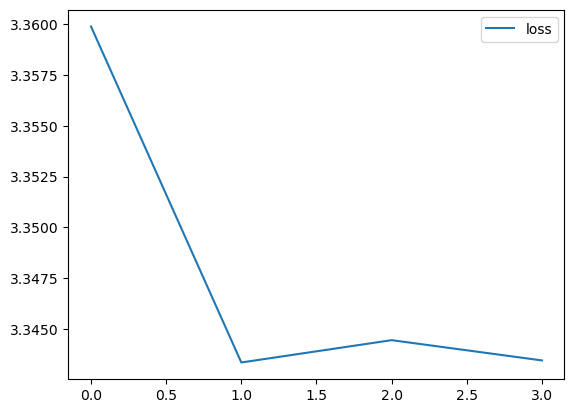

In [46]:
sns.lineplot(cnn.history.history["loss"], label="loss")
plt.show()